# TODO
- dataviz

In [1]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sb
from os import listdir
import time, sys

sys.path.append('../')

import lib.viz as viz
import lib.tools as tools

pd.options.display.max_columns = 50

In [44]:
data_path = '../bdc/data/'

**Tout mettre dans 1 fichier**

In [3]:
# train_path = data_path + 'train/'
# train = None
# for file_ in listdir(train_path):
#     if 'train' in file_:
#         if train is None:
#             train = pd.read_csv(train_path + file_, header=0, delimiter=";", parse_dates=['date'])
#         else:
#             train = pd.concat([train, pd.read_csv(train_path + file_, header=0, delimiter=";", parse_dates=['date'])])
# train.to_csv(data_path + "train.csv", sep=';', index=False)

In [4]:
train = pd.read_csv(data_path + "train/train_30.csv", header=0, delimiter=";",decimal=',',
                    parse_dates=['date'], index_col='date')

In [5]:
train.head(5)

,insee,tH2_obs,capeinsSOL0,ciwcH20,clwcH20,ddH10_rose4,ffH10,flir1SOL0,fllat1SOL0,flsen1SOL0,flvis1SOL0,hcoulimSOL0,huH2,iwcSOL0,nbSOL0_HMoy,nH20,ntSOL0_HMoy,pMER0,rr1SOL0,rrH20,tH2,tH2_VGrad_2.100,tH2_XGrad,tH2_YGrad,tpwHPA850,ux1H10,vapcSOL0,vx1H10,ech,mois
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-01-01,6088001,7.8,38.245480,0.0,0.0,1.0,1.423250,-100292.923371,-108461.086720,-26163.859606,0.0,503.778766,79.213137,0.0,5.857651,0.0,7.961908,1014.035619,-0.012267,0.000000,11.657800,-0.856984,0.004141,-0.003377,8.088612,-1.244766,20.734754,-4.553151,30,janvier
2014-01-01,31069001,9.2,22.303022,0.0,0.0,3.0,2.408082,-18815.426563,-11894.040428,14095.776354,0.0,729.086833,90.978967,0.0,8.000000,0.0,8.000000,1010.331761,0.145260,0.008258,8.023305,1.454075,0.001222,0.000489,10.107755,1.112657,18.586576,3.962234,30,janvier
2014-01-01,33281001,9.3,194.861009,0.0,0.0,4.0,4.535840,-61941.404781,-81870.097549,179862.881572,0.0,897.634612,92.801612,0.0,7.744064,0.0,7.969099,1006.380424,0.074460,0.018740,11.243986,-0.127558,0.000368,0.000737,10.006774,7.714926,19.378744,8.029170,30,janvier
2014-01-01,35281001,7.6,182.890703,0.0,0.0,3.0,4.881681,-227613.396837,2019.225971,176067.945920,0.0,262.459860,90.571364,0.0,3.776259,0.0,5.286151,999.551696,0.000000,0.000000,7.623182,0.243659,0.001054,-0.001233,7.359926,4.667206,13.485018,6.427848,30,janvier
2014-01-01,59343001,9.9,31.526467,0.0,0.0,3.0,8.086883,-80526.229570,-76652.492578,192696.865313,0.0,1073.007502,88.712385,0.0,6.468433,0.0,8.000000,994.476250,-0.000781,0.000000,9.012843,-0.363116,-0.000285,0.000543,7.512743,6.852292,14.622403,11.882253,30,janvier


In [6]:
train.tail(1)

,insee,tH2_obs,capeinsSOL0,ciwcH20,clwcH20,ddH10_rose4,ffH10,flir1SOL0,fllat1SOL0,flsen1SOL0,flvis1SOL0,hcoulimSOL0,huH2,iwcSOL0,nbSOL0_HMoy,nH20,ntSOL0_HMoy,pMER0,rr1SOL0,rrH20,tH2,tH2_VGrad_2.100,tH2_XGrad,tH2_YGrad,tpwHPA850,ux1H10,vapcSOL0,vx1H10,ech,mois
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-05-30,75114001,12.5,2.818198,0.0,0.0,4.0,4.730778,-25714.018871,-91268.391242,-24893.136842,41743.419074,648.958456,87.014844,0.0,8.0,0.0,8.0,1008.250199,0.824805,0.080059,12.343202,-1.16857,0.000467,0.00131,14.466925,8.895326,30.78891,-3.814131,30,mai


In [7]:
train.describe(include='all')

,insee,tH2_obs,capeinsSOL0,ciwcH20,clwcH20,ddH10_rose4,ffH10,flir1SOL0,fllat1SOL0,flsen1SOL0,flvis1SOL0,hcoulimSOL0,huH2,iwcSOL0,nbSOL0_HMoy,nH20,ntSOL0_HMoy,pMER0,rr1SOL0,rrH20,tH2,tH2_VGrad_2.100,tH2_XGrad,tH2_YGrad,tpwHPA850,ux1H10,vapcSOL0,vx1H10,ech,mois
count,6.167000e+03,6167.000000,5551.000000,6.167000e+03,6.041000e+03,6041,6041.000000,6160.000000,6.160000e+03,6160.000000,6160.000000,6167.000000,6041.000000,6160.000000,6160.000000,5831.000000,6160.000000,6034.000000,6160.000000,6048.000000,6041.000000,6041.000000,6041.000000,6041.000000,6160.000000,6041.000000,6167.000000,6041.000000,6167.0,6167
unique,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
top,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,janvier
freq,NaN,NaN,NaN,NaN,NaN,1875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,651
mean,4.390000e+07,10.296627,30.210074,1.116815e-07,1.295399e-05,NaN,2.987004,-164222.246876,-4.480046e+04,19691.762921,113917.870527,310.720918,84.230438,0.026781,3.289722,0.542438,5.380670,1016.817542,0.073363,0.003224,10.271349,0.307702,0.001235,0.000028,9.560853,0.947032,17.707615,0.719772,30.0,NaN
std,2.246953e+07,5.835699,96.864658,1.714985e-06,5.472359e-05,NaN,1.946888,107340.093730,8.496074e+04,73137.022313,174439.099716,346.850183,12.344721,0.373298,3.364038,1.839701,3.232048,8.591797,0.383785,0.018154,6.098587,1.721683,0.002029,0.003069,4.563407,4.184865,7.849589,4.368275,0.0,NaN
min,6.088001e+06,-6.400000,0.000000,0.000000e+00,0.000000e+00,NaN,0.028085,-522302.660251,-1.145786e+06,-229071.283900,0.000000,1.838477,24.767455,0.000000,0.000000,0.000000,0.000000,981.899875,-0.019531,0.000000,-9.776349,-2.202656,-0.008235,-0.019682,-2.893943,-18.812615,2.057573,-14.345835,30.0,NaN
25%,3.106900e+07,6.100000,0.036675,0.000000e+00,0.000000e+00,NaN,1.617029,-249371.716476,-6.585640e+04,-19747.093793,0.000000,71.148288,78.679369,0.000000,0.002959,0.000000,1.875227,1011.889121,0.000000,0.000000,5.696904,-0.884094,0.000067,-0.000617,6.270626,-1.394248,11.667361,-2.276101,30.0,NaN
50%,3.528100e+07,10.100000,1.534850,0.000000e+00,0.000000e+00,NaN,2.534329,-182240.867188,-1.331940e+04,4873.812969,3483.362110,192.831584,87.586665,0.000000,1.824873,0.000000,7.524913,1017.054016,0.000000,0.000000,10.290151,-0.279745,0.000857,0.000279,9.555197,0.650782,16.421602,0.188786,30.0,NaN
75%,6.712400e+07,14.400000,11.841504,0.000000e+00,1.726422e-08,NaN,3.904950,-57922.039030,3.905953e+03,47356.991500,185317.924669,431.076599,92.966571,0.000000,7.343966,0.000000,8.000000,1022.235893,0.000836,0.000000,14.471678,1.054088,0.002096,0.001452,12.858766,3.022610,22.778160,3.293768,30.0,NaN


**tH2_obs** :	Observation de la température à 2 mètres in situ- au point station (prédictant)  
**capeinsSOL0**: 	Energie potentielle convective  
**ciwcH20**: 	Fraction de glace nuageuse à 20 mètres  
**clwcH20**: 	Fraction d'eau nuageuse à 20 mètres  
**ddH10_rose4**: 	Direction du vent à 10 mètres en rose4  
**ffH10**: 	Force du vent à 10 mètres en m/s  
**flir1SOL0**: 	Flux Infra-rouge en J/m2  
**fllat1SOL0**: 	Flux de chaleur latente en J/m2  
**flsen1SOL0**: 	Flux de chaleur sensible en J/m2  
**flvis1SOL0**: 	Flux visible en J/m2  
**hcoulimSOL0**: 	Hauteur de la couche limite en mètres  
**huH2**: 	Humidité 2mètres en %  
**iwcSOL0**: 	Réservoir neige kg/m2 (équivalent en eau liquide des chutes de neige)  
**nbSOL0_HMoy**: 	Nébulosité basse (moyenne sur les 6 points de grille autour de la station) (fraction en octat du ciel occulté)  
**nH20**: 	Fraction nuageuse à 20 mètres  
**ntSOL0_HMoy**: 	Nébulosité totale (moyenne sur les 6 points de grille autour de la station)  
**pMER0**: 	Pression au niveau de la mer  
**rr1SOL0**: 	Précipitation horaire au niveau du sol  
**rrH20**: 	Précipitation horaire à 20 mètres  
**tH2**: 	Température à 2 mètres du modèle AROME  
**tH2_VGrad_2.100**: 	Gradient vertical de température entre 2 mètres et 100 mètres  
**tH2_XGrad**: 	Gradient zonal de température à 2 mètres  
**tH2_YGrad**: 	Gradient méridien de température à 2 mètres  
**tpwHPA850**: 	Température potentielle au niveau 850 hPa  
**ux1H10**: 	Rafale 1 minute du vent à 10 mètres composante zonale  
**vapcSOL0**: 	Colonne de vapeur d'eau  
**vx1H10**: 	Rafale 1 minute du vent à 10 mètres composante verticale  
**ech** : 	Echéance de validité = date   

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6167 entries, 2014-01-01 to 2016-05-30
Data columns (total 30 columns):
insee              6167 non-null int64
tH2_obs            6167 non-null float64
capeinsSOL0        5551 non-null float64
ciwcH20            6167 non-null float64
clwcH20            6041 non-null float64
ddH10_rose4        6041 non-null object
ffH10              6041 non-null float64
flir1SOL0          6160 non-null float64
fllat1SOL0         6160 non-null float64
flsen1SOL0         6160 non-null float64
flvis1SOL0         6160 non-null float64
hcoulimSOL0        6167 non-null float64
huH2               6041 non-null float64
iwcSOL0            6160 non-null float64
nbSOL0_HMoy        6160 non-null float64
nH20               5831 non-null float64
ntSOL0_HMoy        6160 non-null float64
pMER0              6034 non-null float64
rr1SOL0            6160 non-null float64
rrH20              6048 non-null float64
tH2                6041 non-null float64
tH2_VGrad_2.100  

# Converting type

In [9]:
train.insee = train.insee.astype('str')
train.ddH10_rose4 = train.ddH10_rose4.astype('category')

# Univariate analysis

In [10]:
train.describe(include='all')

,insee,tH2_obs,capeinsSOL0,ciwcH20,clwcH20,ddH10_rose4,ffH10,flir1SOL0,fllat1SOL0,flsen1SOL0,flvis1SOL0,hcoulimSOL0,huH2,iwcSOL0,nbSOL0_HMoy,nH20,ntSOL0_HMoy,pMER0,rr1SOL0,rrH20,tH2,tH2_VGrad_2.100,tH2_XGrad,tH2_YGrad,tpwHPA850,ux1H10,vapcSOL0,vx1H10,ech,mois
count,6167,6167.000000,5551.000000,6.167000e+03,6.041000e+03,6041,6041.000000,6160.000000,6.160000e+03,6160.000000,6160.000000,6167.000000,6041.000000,6160.000000,6160.000000,5831.000000,6160.000000,6034.000000,6160.000000,6048.000000,6041.000000,6041.000000,6041.000000,6041.000000,6160.000000,6041.000000,6167.000000,6041.000000,6167.0,6167
unique,7,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
top,6088001,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,janvier
freq,881,NaN,NaN,NaN,NaN,1875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,651
mean,NaN,10.296627,30.210074,1.116815e-07,1.295399e-05,NaN,2.987004,-164222.246876,-4.480046e+04,19691.762921,113917.870527,310.720918,84.230438,0.026781,3.289722,0.542438,5.380670,1016.817542,0.073363,0.003224,10.271349,0.307702,0.001235,0.000028,9.560853,0.947032,17.707615,0.719772,30.0,NaN
std,NaN,5.835699,96.864658,1.714985e-06,5.472359e-05,NaN,1.946888,107340.093730,8.496074e+04,73137.022313,174439.099716,346.850183,12.344721,0.373298,3.364038,1.839701,3.232048,8.591797,0.383785,0.018154,6.098587,1.721683,0.002029,0.003069,4.563407,4.184865,7.849589,4.368275,0.0,NaN
min,NaN,-6.400000,0.000000,0.000000e+00,0.000000e+00,NaN,0.028085,-522302.660251,-1.145786e+06,-229071.283900,0.000000,1.838477,24.767455,0.000000,0.000000,0.000000,0.000000,981.899875,-0.019531,0.000000,-9.776349,-2.202656,-0.008235,-0.019682,-2.893943,-18.812615,2.057573,-14.345835,30.0,NaN
25%,NaN,6.100000,0.036675,0.000000e+00,0.000000e+00,NaN,1.617029,-249371.716476,-6.585640e+04,-19747.093793,0.000000,71.148288,78.679369,0.000000,0.002959,0.000000,1.875227,1011.889121,0.000000,0.000000,5.696904,-0.884094,0.000067,-0.000617,6.270626,-1.394248,11.667361,-2.276101,30.0,NaN
50%,NaN,10.100000,1.534850,0.000000e+00,0.000000e+00,NaN,2.534329,-182240.867188,-1.331940e+04,4873.812969,3483.362110,192.831584,87.586665,0.000000,1.824873,0.000000,7.524913,1017.054016,0.000000,0.000000,10.290151,-0.279745,0.000857,0.000279,9.555197,0.650782,16.421602,0.188786,30.0,NaN
75%,NaN,14.400000,11.841504,0.000000e+00,1.726422e-08,NaN,3.904950,-57922.039030,3.905953e+03,47356.991500,185317.924669,431.076599,92.966571,0.000000,7.343966,0.000000,8.000000,1022.235893,0.000836,0.000000,14.471678,1.054088,0.002096,0.001452,12.858766,3.022610,22.778160,3.293768,30.0,NaN


In [13]:
train.columns.values

array(['insee', 'tH2_obs', 'capeinsSOL0', 'ciwcH20', 'clwcH20',
       'ddH10_rose4', 'ffH10', 'flir1SOL0', 'fllat1SOL0', 'flsen1SOL0',
       'flvis1SOL0', 'hcoulimSOL0', 'huH2', 'iwcSOL0', 'nbSOL0_HMoy',
       'nH20', 'ntSOL0_HMoy', 'pMER0', 'rr1SOL0', 'rrH20', 'tH2',
       'tH2_VGrad_2.100', 'tH2_XGrad', 'tH2_YGrad', 'tpwHPA850', 'ux1H10',
       'vapcSOL0', 'vx1H10', 'ech', 'mois'], dtype=object)

In [14]:
var_used = ['capeinsSOL0', 'ciwcH20', 'clwcH20',
       'ffH10', 'flir1SOL0', 'fllat1SOL0', 'flsen1SOL0',
       'flvis1SOL0', 'hcoulimSOL0', 'huH2', 'iwcSOL0', 'nbSOL0_HMoy',
       'nH20', 'ntSOL0_HMoy', 'pMER0', 'rr1SOL0', 'rrH20', 'tH2',
       'tH2_VGrad_2.100', 'tH2_XGrad', 'tH2_YGrad', 'tpwHPA850', 'ux1H10',
       'vapcSOL0', 'vx1H10', 'ech']

<IPython.core.display.Javascript object>


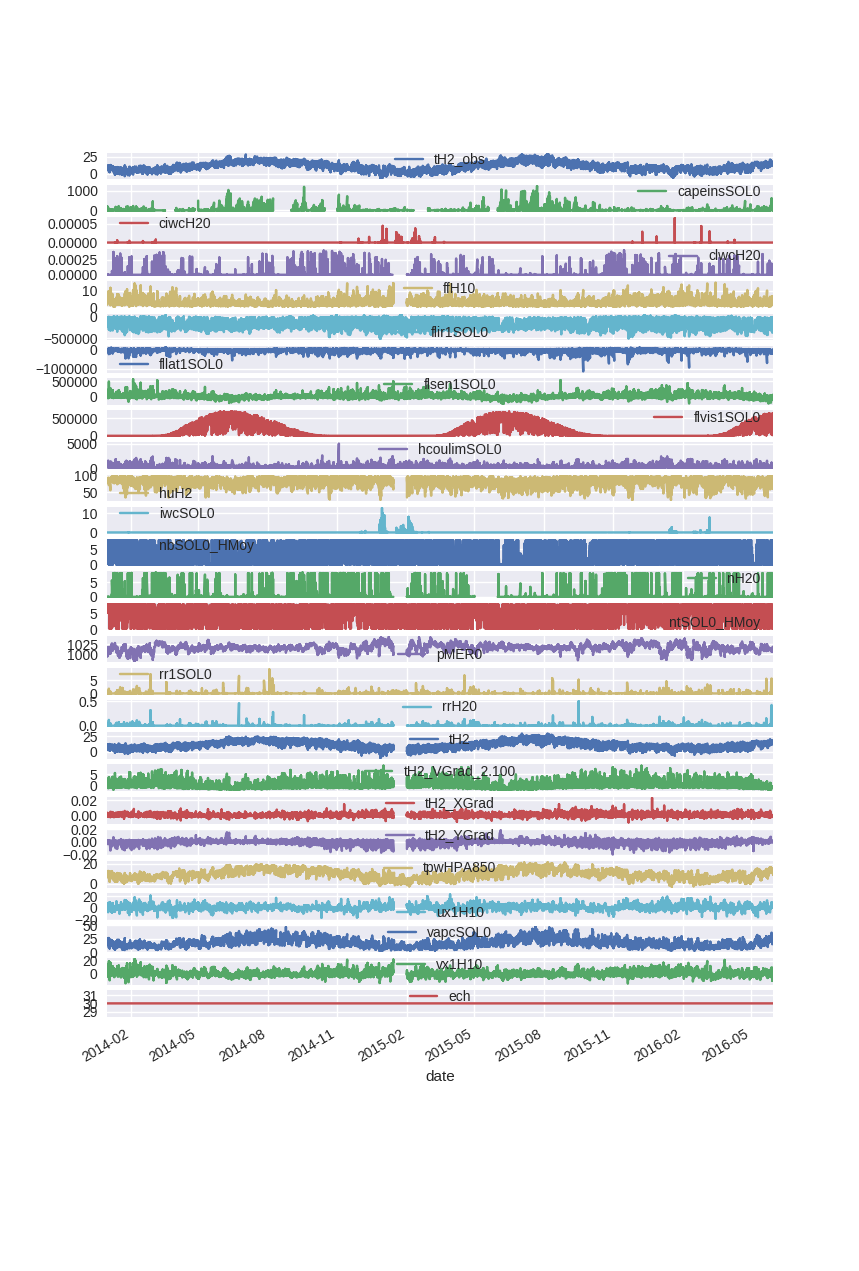

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa646ee2b10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fa645a93d10>], dtype=object)

In [30]:
train.plot(subplots=True)

Thats a mess, lets analyze it per week and per month

## Weekly analysis

<IPython.core.display.Javascript object>


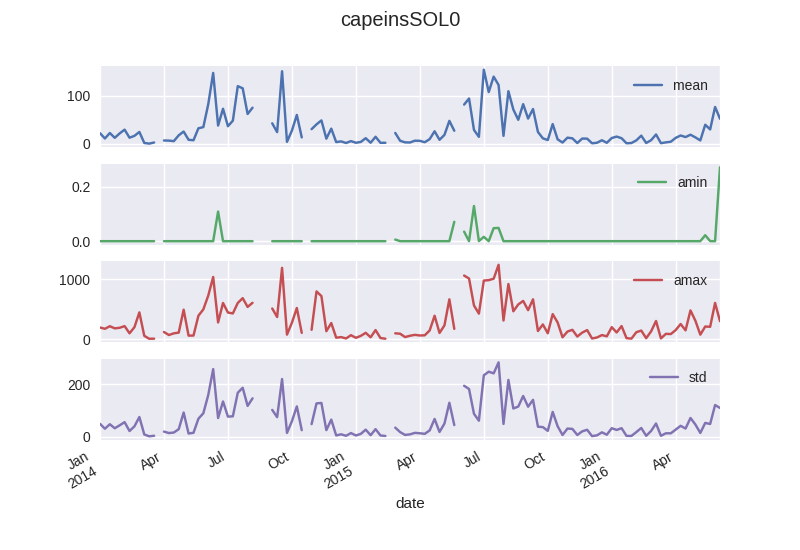

<IPython.core.display.Javascript object>


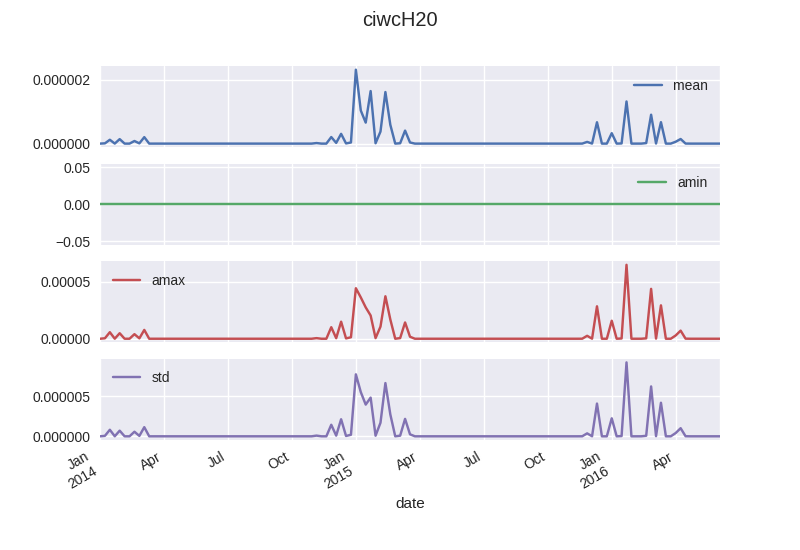

<IPython.core.display.Javascript object>


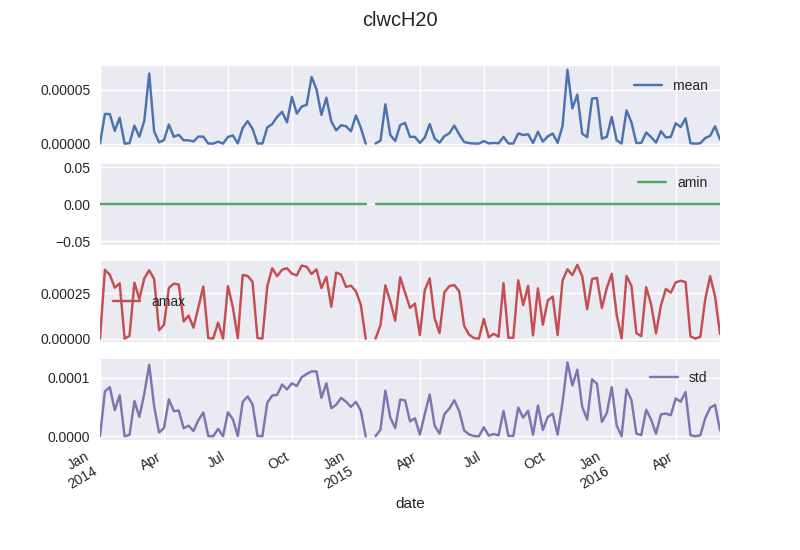

<IPython.core.display.Javascript object>


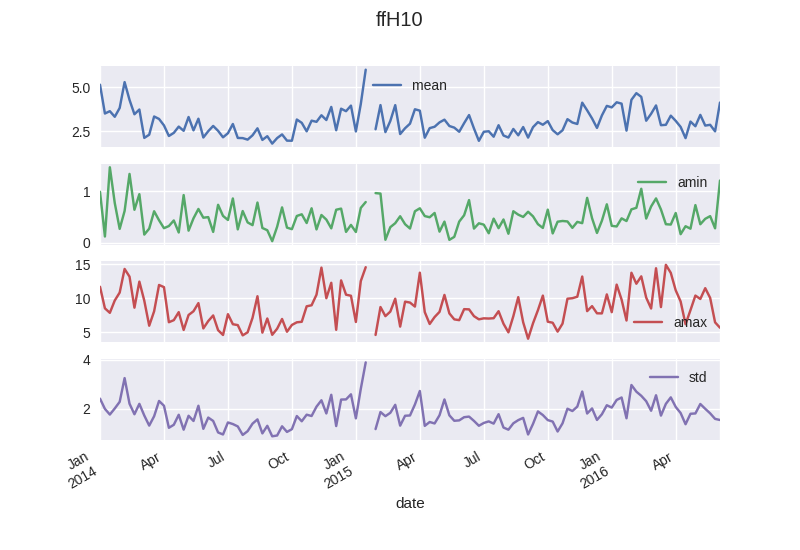

<IPython.core.display.Javascript object>


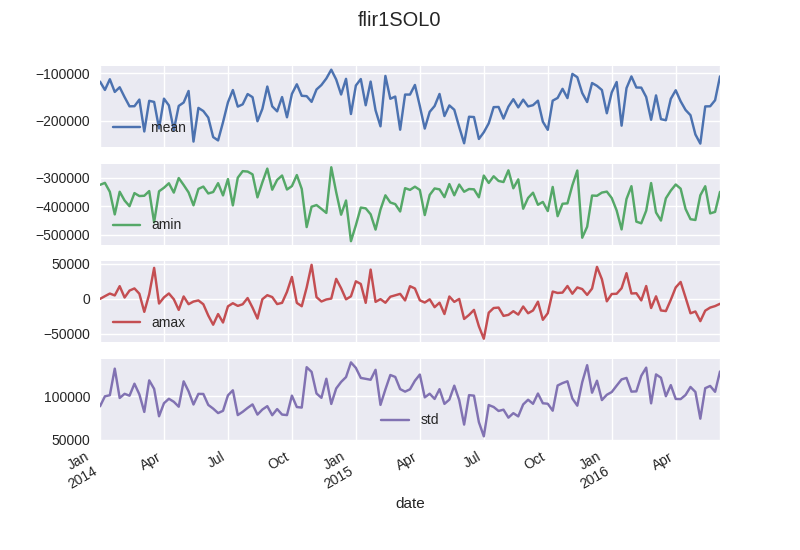

<IPython.core.display.Javascript object>


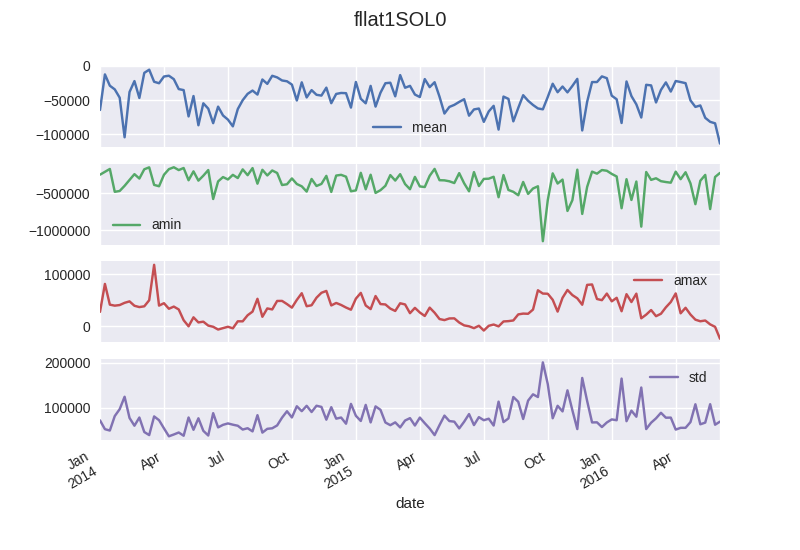

<IPython.core.display.Javascript object>


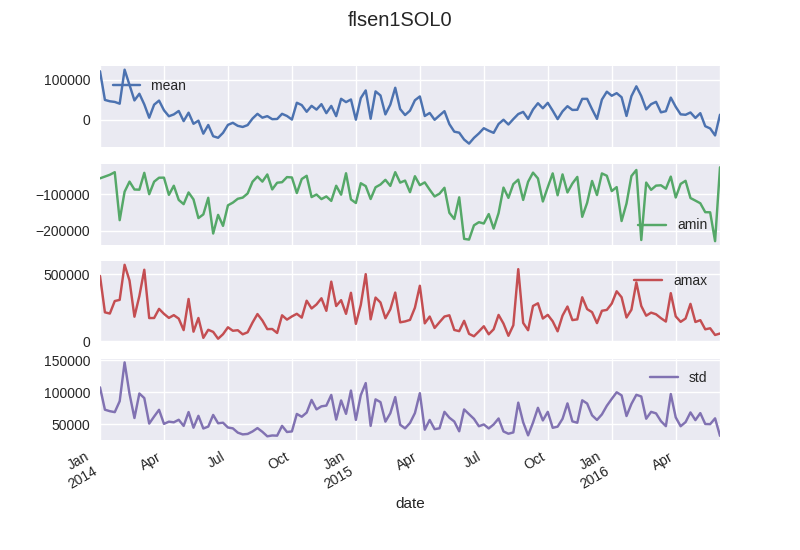

<IPython.core.display.Javascript object>


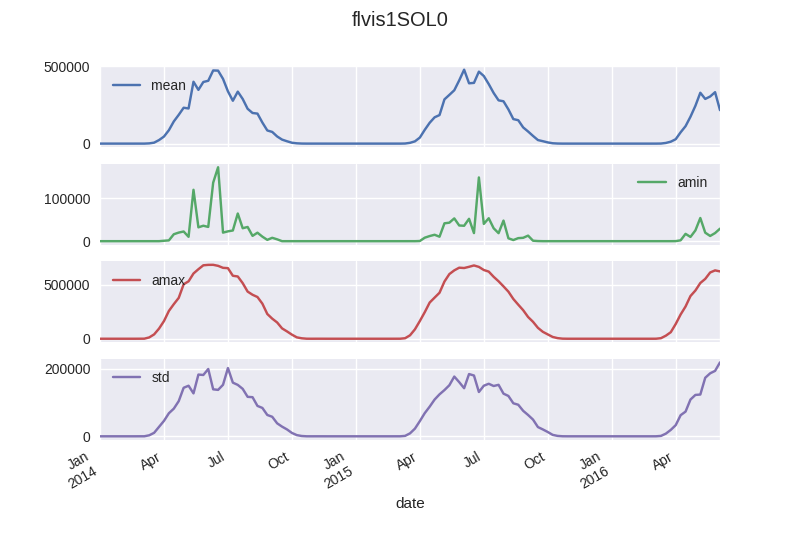

<IPython.core.display.Javascript object>


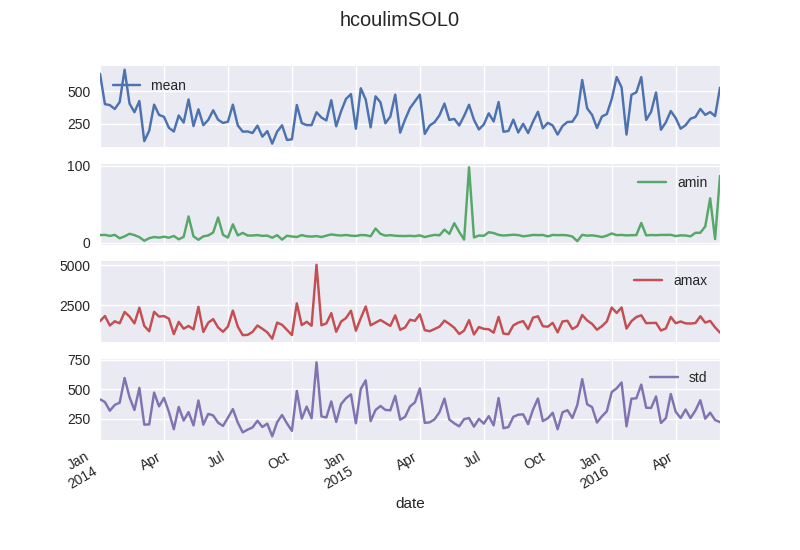

<IPython.core.display.Javascript object>


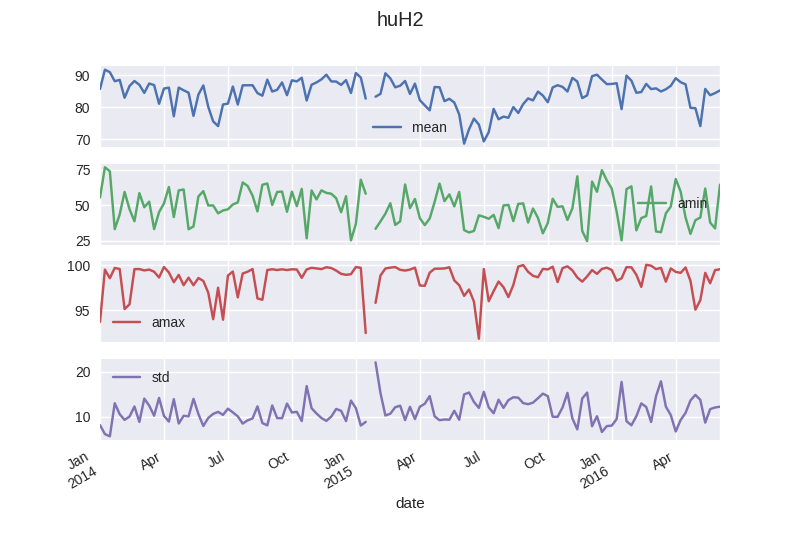

<IPython.core.display.Javascript object>


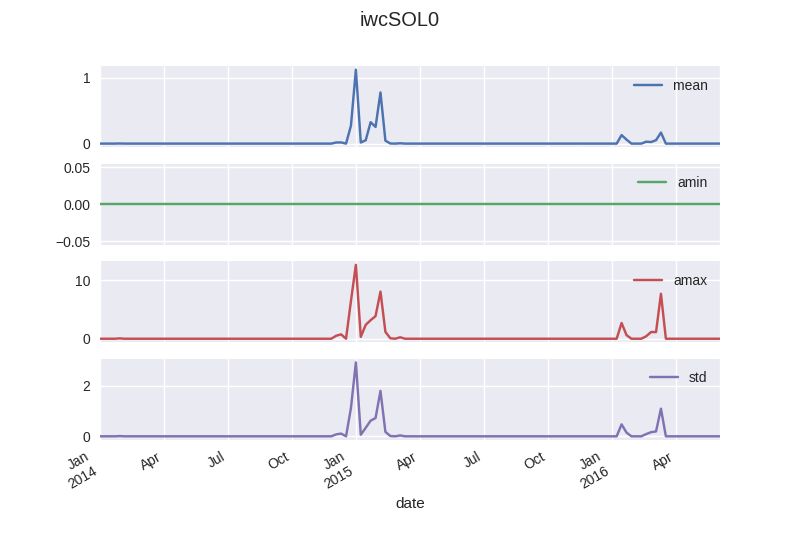

<IPython.core.display.Javascript object>


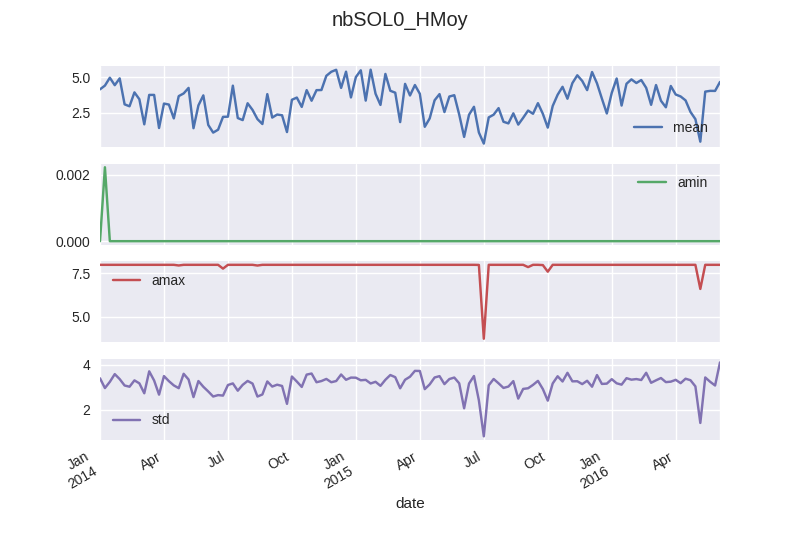

<IPython.core.display.Javascript object>


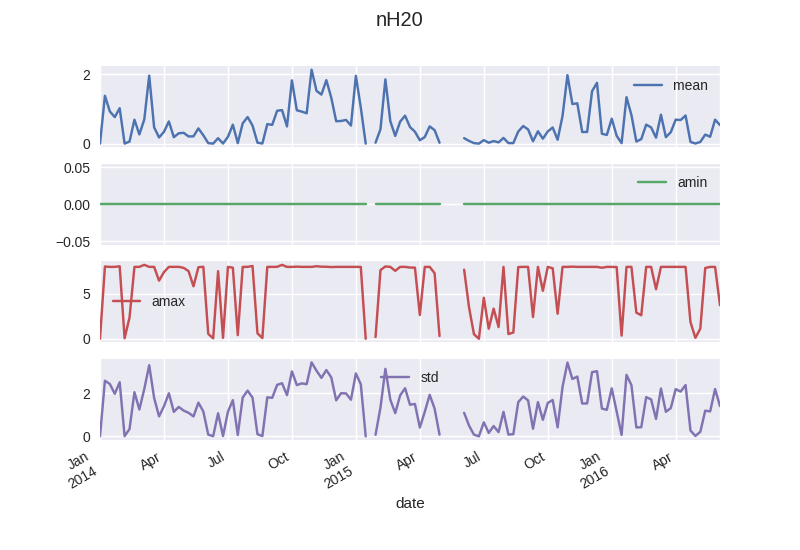

<IPython.core.display.Javascript object>


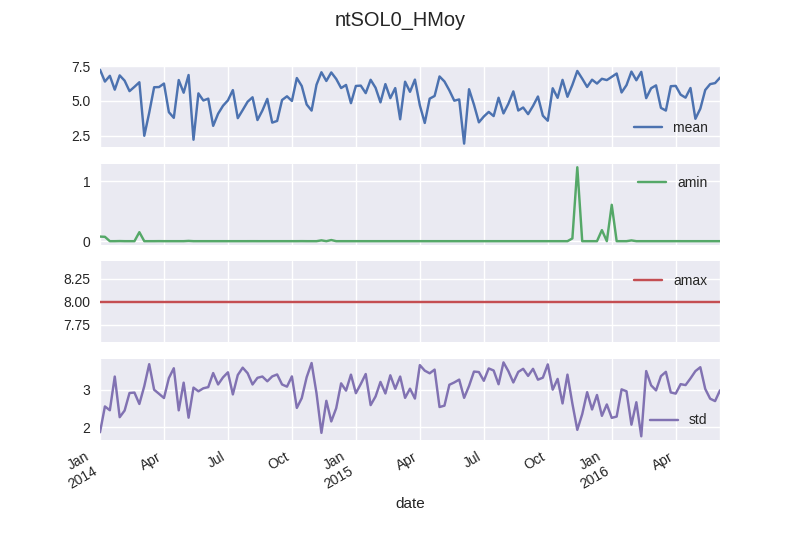

<IPython.core.display.Javascript object>


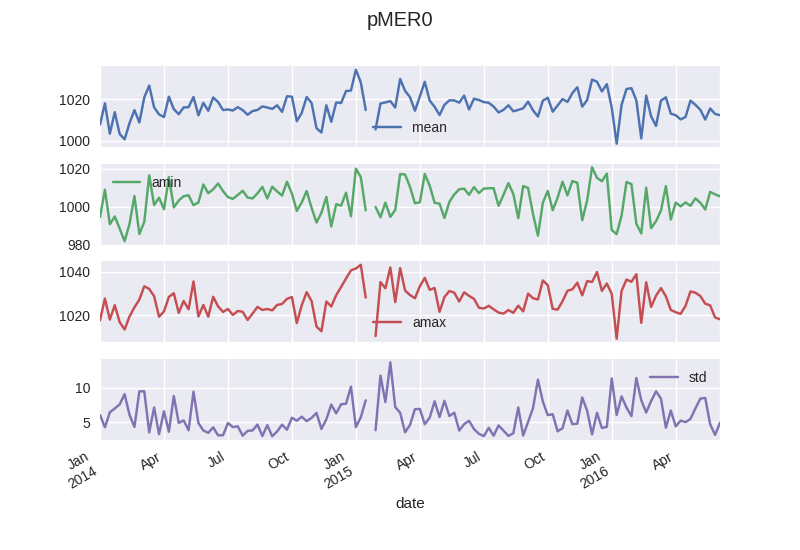

<IPython.core.display.Javascript object>


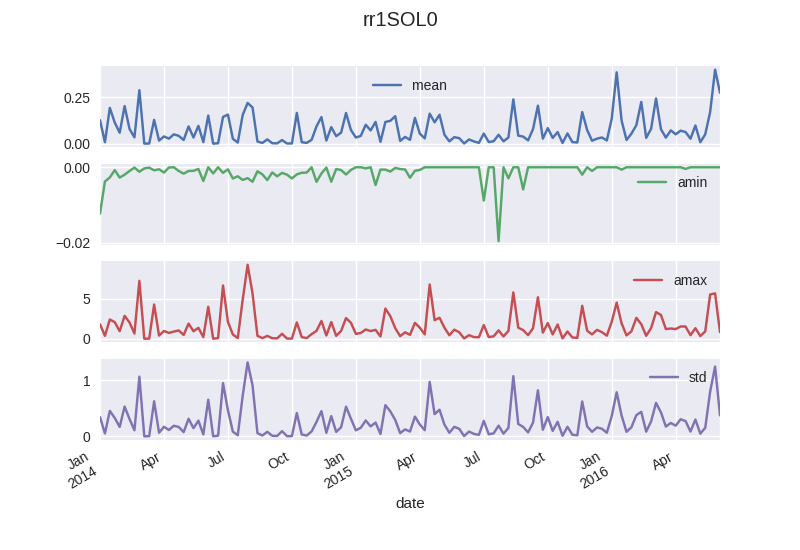

<IPython.core.display.Javascript object>


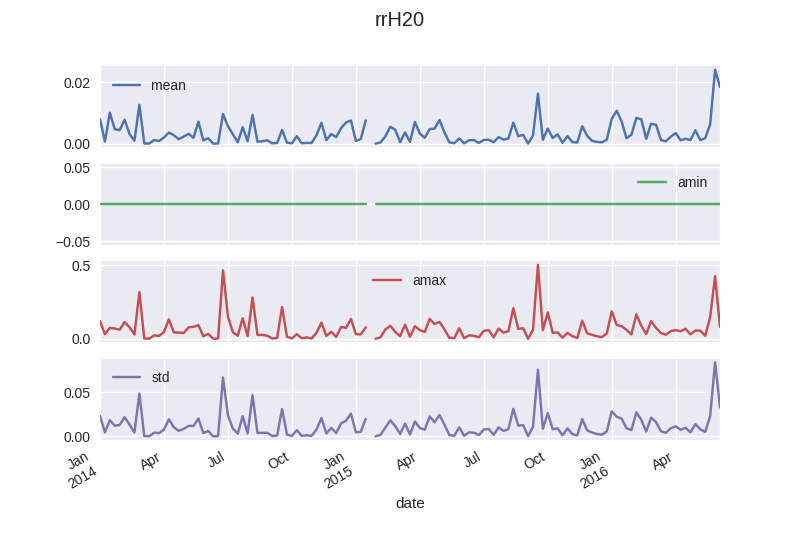

<IPython.core.display.Javascript object>


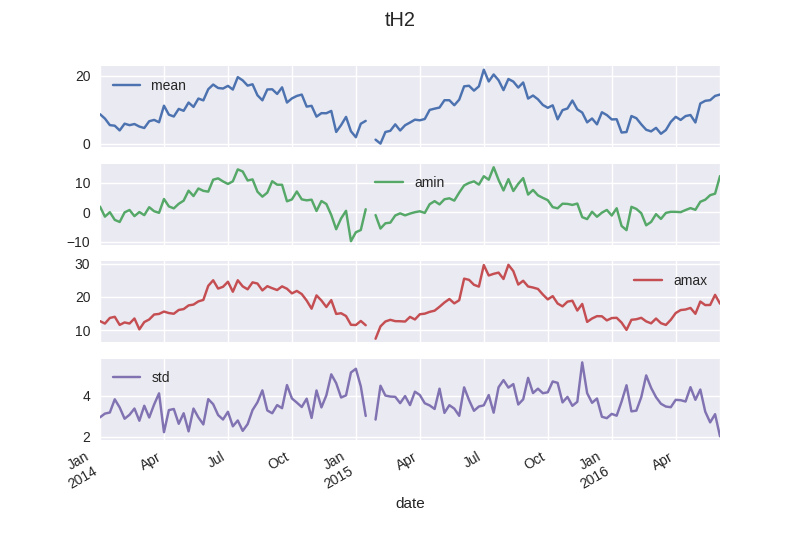

<IPython.core.display.Javascript object>


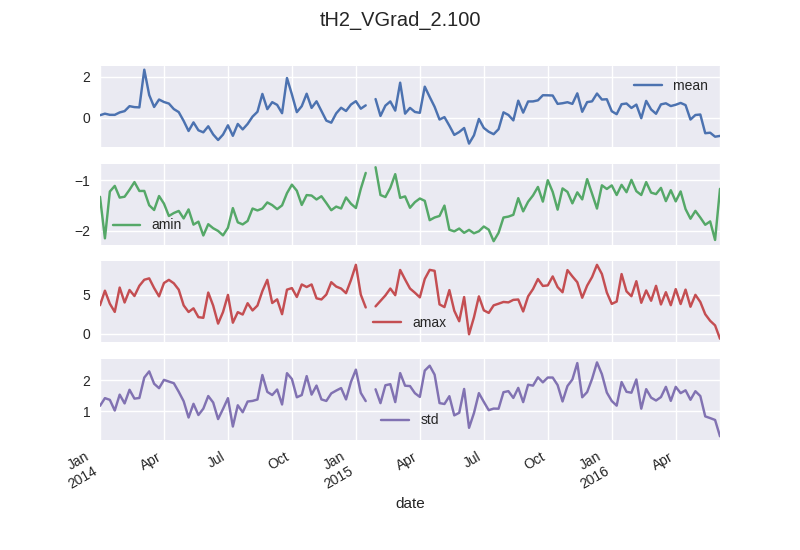

<IPython.core.display.Javascript object>


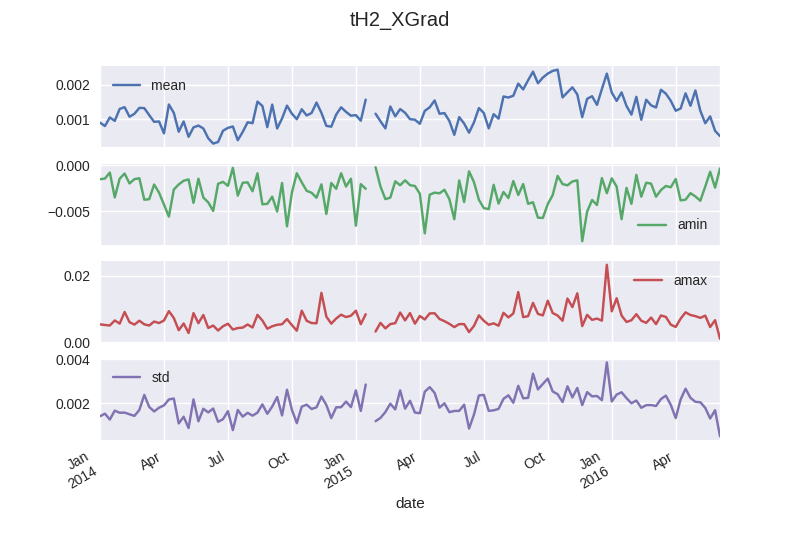

<IPython.core.display.Javascript object>


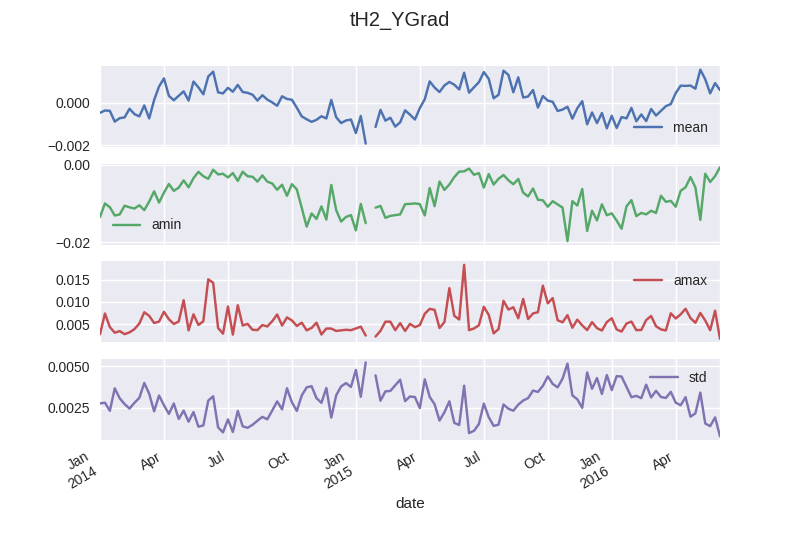

<IPython.core.display.Javascript object>


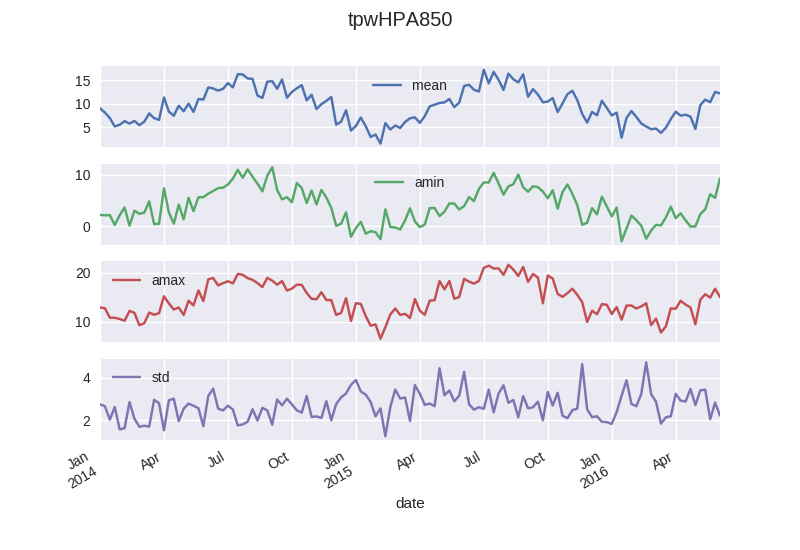

<IPython.core.display.Javascript object>


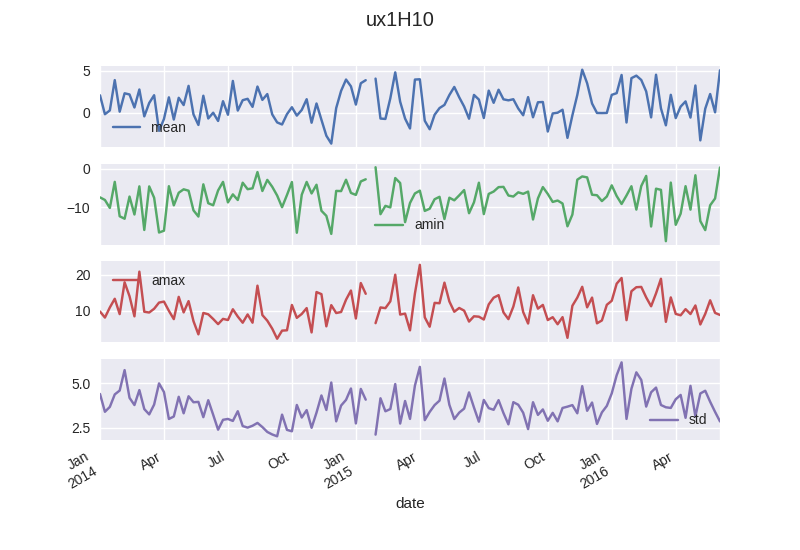

<IPython.core.display.Javascript object>


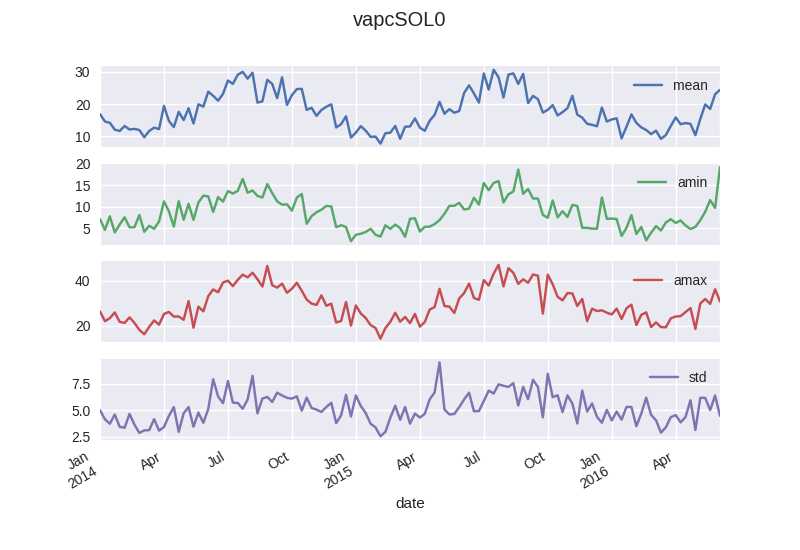

<IPython.core.display.Javascript object>


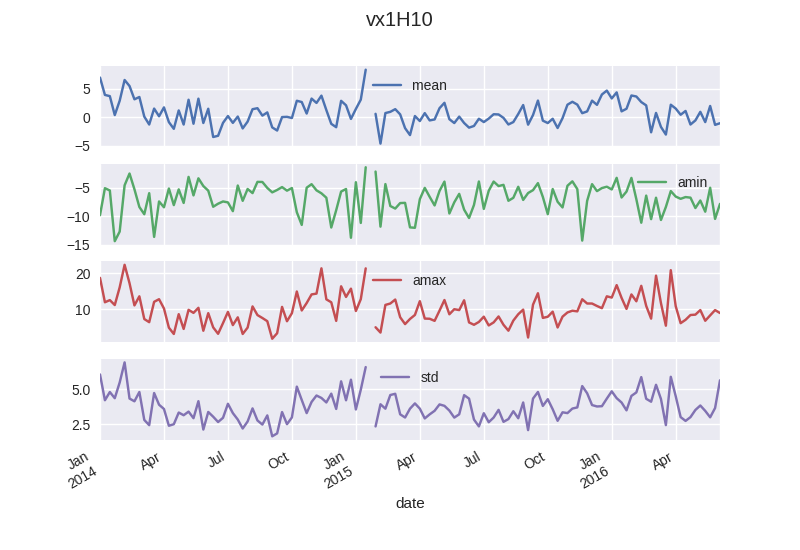

<IPython.core.display.Javascript object>


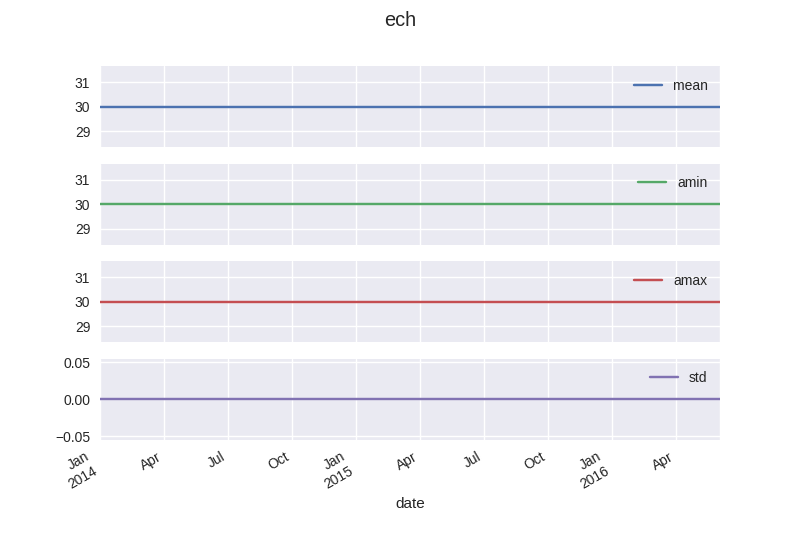

In [35]:
weekly = pd.DataFrame()
for var in var_used:
    weekly = train[var].resample('W').apply(['mean', np.min, np.max, 'std'])
    weekly.plot(subplots=True, title=var)

THere are missing values

## Rows with nan

In [16]:
# Coordinate of missing values
np.where(np.asanyarray(pd.isnull(train)))

(array([ 539,  540,  541, ..., 4633, 4633, 4633]),
 array([ 2,  2,  2, ..., 24, 25, 27]))

In [40]:
train.iloc[539+14,:]

insee                 6088001
tH2_obs                  11.7
capeinsSOL0               NaN
ciwcH20                     0
clwcH20                     0
ddH10_rose4               4.0
ffH10                 1.90916
flir1SOL0             -290717
fllat1SOL0           -75182.6
flsen1SOL0           -14694.3
flvis1SOL0            25880.9
hcoulimSOL0           178.046
huH2                  81.6646
iwcSOL0                     0
nbSOL0_HMoy            2.3402
nH20                        0
ntSOL0_HMoy           7.95726
pMER0                 1015.77
rr1SOL0                     0
rrH20                       0
tH2                   12.3127
tH2_VGrad_2.100       -1.0294
tH2_XGrad          0.00241368
tH2_YGrad         -0.00512881
tpwHPA850             9.20378
ux1H10                2.85108
vapcSOL0              18.0651
vx1H10                2.34859
ech                        30
mois                     mars
Name: 2014-03-21 00:00:00, dtype: object

In [19]:
np.where(train.isnull().sum(axis=1).values > 0)

(array([ 539,  540,  541,  542,  543,  544,  545,  546,  547,  548,  549,
         550,  551,  552,  553,  554,  555,  556,  557,  558,  559,  560,
         561,  562,  563,  564,  565,  566,  567,  568,  569,  570,  571,
         572,  573,  574,  575,  576,  577,  578,  579,  580,  581,  582,
         583,  584,  585,  586,  587,  588,  589,  590,  591,  592,  593,
         594,  595,  596,  597,  598,  599,  600,  601,  602,  603,  604,
         605,  606,  607,  608,  609,  610,  611,  612,  613,  614,  615,
         616,  617,  618,  619,  620,  621,  622,  623,  624,  625,  626,
         627,  628,  629,  812,  813,  814,  815,  816,  817,  818,  819,
         820,  821,  822,  823,  824,  825,  826,  827,  828,  829,  830,
         831,  832,  833,  834,  835,  836,  837,  838,  839, 1540, 1541,
        1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552,
        1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563,
        1564, 1565, 1566, 1567, 1568, 

In [20]:
train.isnull().sum()

insee                0
tH2_obs              0
capeinsSOL0        616
ciwcH20              0
clwcH20            126
ddH10_rose4        126
ffH10              126
flir1SOL0            7
fllat1SOL0           7
flsen1SOL0           7
flvis1SOL0           7
hcoulimSOL0          0
huH2               126
iwcSOL0              7
nbSOL0_HMoy          7
nH20               336
ntSOL0_HMoy          7
pMER0              133
rr1SOL0              7
rrH20              119
tH2                126
tH2_VGrad_2.100    126
tH2_XGrad          126
tH2_YGrad          126
tpwHPA850            7
ux1H10             126
vapcSOL0             0
vx1H10             126
ech                  0
mois                 0
dtype: int64

In [19]:
train.capeinsSOL0[539-7], train.capeinsSOL0.interpolate()[539], train.capeinsSOL0[539+7]

(7.7146291615864895, 5.9048312857899541, nan)

## Analysis per city

### Temp

In [29]:
groupby_city = train.groupby('insee')

<IPython.core.display.Javascript object>


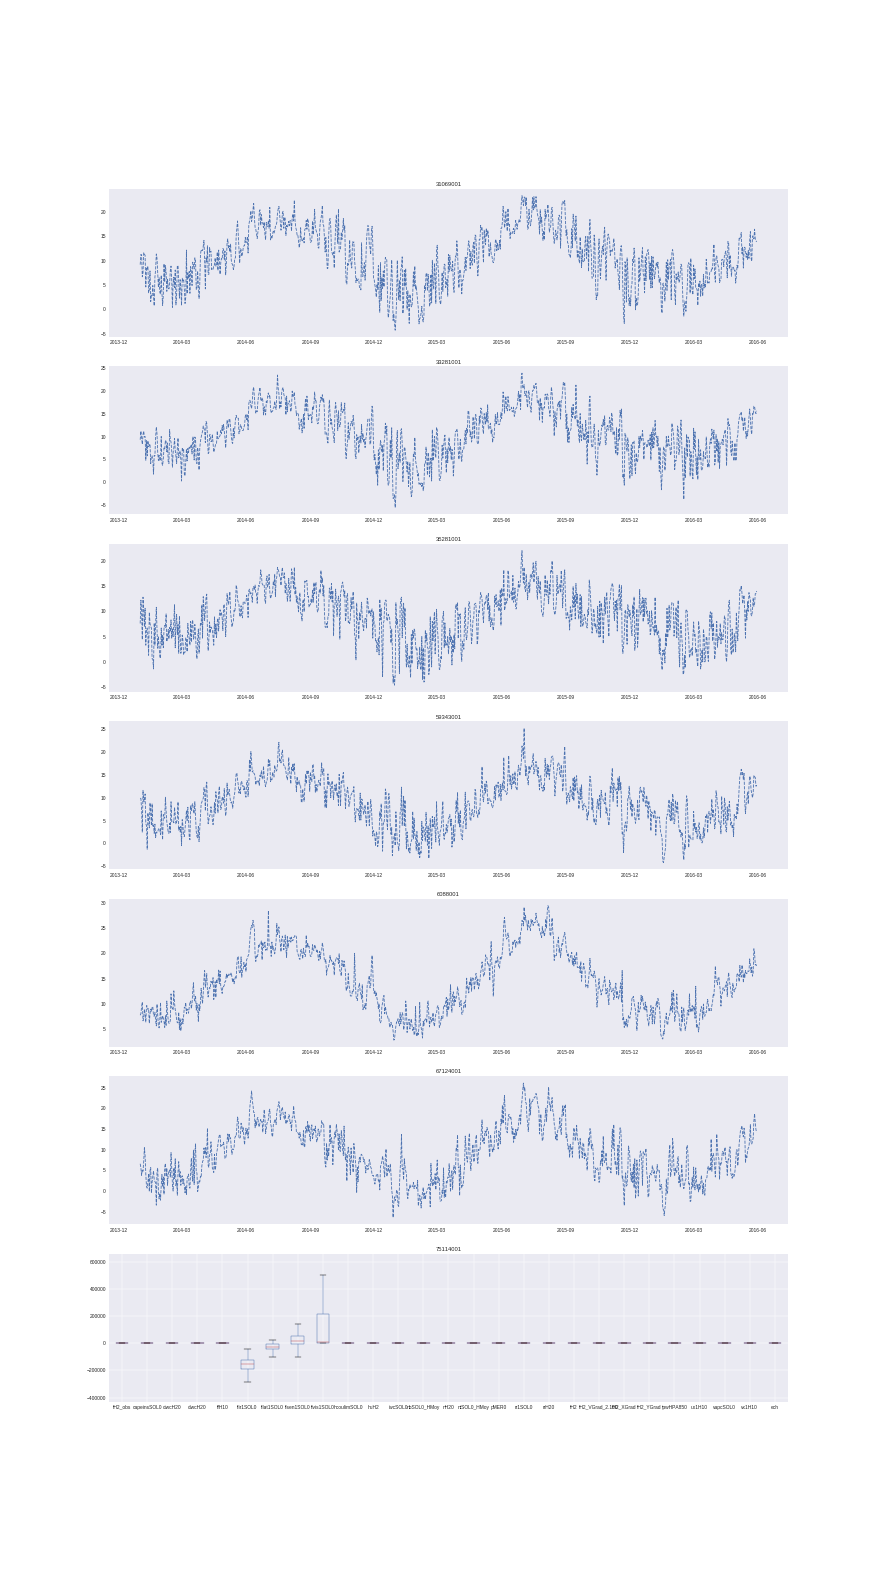

In [30]:
figure = plt.figure(num=None, figsize=(25,45), dpi=35, facecolor='w', edgecolor='k')
nb_row = 7
nb_col = 1
i = 1
for city, vars_ in groupby_city:
    plt.subplot(nb_row, nb_col, i)
    plt.plot(vars_.index, vars_.tH2_obs, '--', label=city)
    i +=1
    plt.title(city)
    plt.grid()
plt.show()

We can see patterns

### Replace na val en utilisant le groupby. Faire des stats par city

https://machinelearningmastery.com/time-series-data-visualization-with-python/

In [42]:
groupby_city.capeinsSOL0.apply(pd.Series.interpolate)

insee     date      
31069001  2014-01-01     22.303022
          2014-01-02      0.000000
          2014-01-03      4.576111
          2014-01-04      0.000000
          2014-01-05      0.000000
          2014-01-06      0.000000
          2014-01-07      0.000000
          2014-01-08      0.000000
          2014-01-09      0.000000
          2014-01-10      0.000000
          2014-01-11      0.395456
          2014-01-12      1.680671
          2014-01-13      0.117292
          2014-01-14      0.581610
          2014-01-15     19.564641
          2014-01-16     24.623643
          2014-01-17      0.000000
          2014-01-18      4.582809
          2014-01-19      1.896430
          2014-01-20      1.699208
          2014-01-21      1.507189
          2014-01-22      7.710528
          2014-01-23     23.475732
          2014-01-24      4.539763
          2014-01-25      5.917333
          2014-01-26     34.121452
          2014-01-27     97.991203
          2014-01-28      0.048976

## Bivariate

In [ ]:
# pickle_file = open(file_path, 'wb')
#     pickle.dump(data, pickle_file, pickle.HIGHEST_PROTOCOL)
#     pickle_file.close()

In [26]:
for var in var_used:
    print(var, train[var].autocorr())

capeinsSOL0 0.253268861424
ciwcH20 0.105552995652
clwcH20 0.119237256825
ffH10 0.347927522337
flir1SOL0 0.189199600394
fllat1SOL0 0.0160342688235
flsen1SOL0 0.453041376859
flvis1SOL0 0.786577404584
hcoulimSOL0 0.299207686299
huH2 0.297722111473
iwcSOL0 0.0410623414429
nbSOL0_HMoy 0.218841129006
nH20 0.133568111044
ntSOL0_HMoy 0.292064623196
pMER0 0.84551453834
rr1SOL0 0.0486483941025
rrH20 0.0464567381623
tH2 0.746959374901
tH2_VGrad_2.100 0.273410406795
tH2_XGrad 0.0746010334809
tH2_YGrad -0.0682690840304
tpwHPA850 0.798659732787
ux1H10 0.405812485885
vapcSOL0 0.72418849133
vx1H10 0.429138043857
ech nan


Certains variables ont une forte autocorr : relevante to the analysis ?

<IPython.core.display.Javascript object>


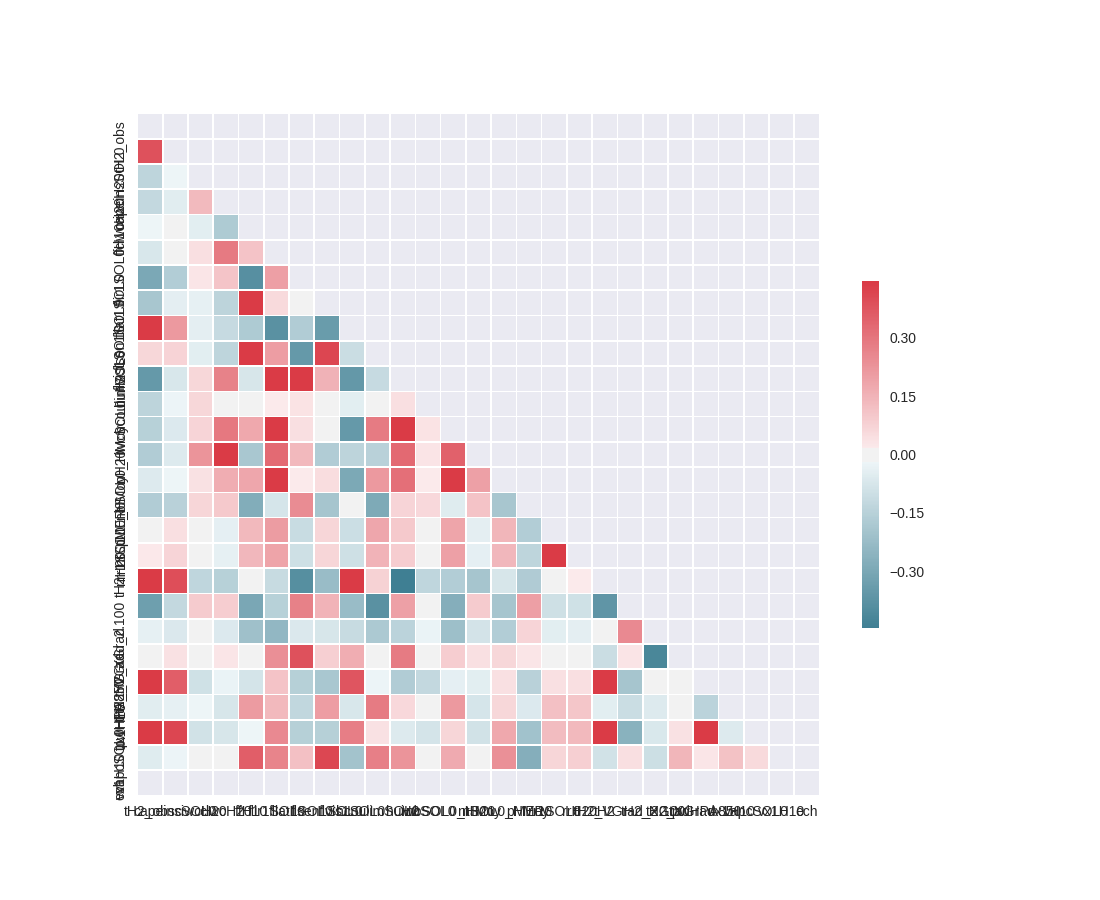

In [42]:
corr = train.corr()

#Mask upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sb.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})